In [16]:
font = {'size'   : 10}
import matplotlib
matplotlib.rc('font', **font)
%matplotlib inline

# Лекция 2: Введение в статистику

## Генеральная совокупность и выборка

Статистика позволяет сделать выводы о _генеральной совокупности_(population) опираясь на результаты _выборки_(sample). Давайте рассмотрим эти термины подробнее. 

Под генеральной совокупностью понимается все множество объектов исследования. Это множество может быть как конечным так и бесконечным. На заре появления статистики генеральной совокупностью являлись, например, "все подданые империи". В исследованиях массы протона генеральной совокупностью являются "все протоны". В зоологии генеральной совокупностью могут являться, например, "все лебеди". В качестве примера бесконечной генеральной совокупности можно привести "все возможные искусственные языки".

Выборкой называются элементы генеральной совокупности участвующие в исследовании. Выборка может быть как частью генеральной совокупности, так и совпадать с ней. Например, при переписи населения выборка (все граждане государства) совпадает с генеральной совокупностью (все граждане государства). При демократических выборах выборка (проголосовавшие граждане) чаще всего является частью от генеральной совокупности (все граждане с правом голоса). Выборка всегда конечна.

Выборка характеризуется количеством элементов, способом выбора элементов, и измерениями проведеными с элементами выборки. 
    
    В ходе первого тура выборов президанта Франции в 2022 году объем выборки составил около 35 миллионов человек, голосующие самостоятельно решили участвовать в выборах, каждый голосующий либо выбрал одного из кандидатов либо испортил биллютень. 
    
    В ходе исследований активности головного мозга были сняты данные ЭЭГ с нескольких сотен добровольцев. Каждый набор данных представляет собой временные ряды напряженности электрического поля в 64 точках на голове испытуемого.
 
Если свойства выборки не отражают свойства генеральной совокупности, такая выборка называется нерепрезентативной или смещеной (biased). Очеивдно, что окончательно убедиться в несмещености выборки в общем случае можно только при совпадении выборки и генеральной совокупности.

    "Интернет-опрос об умении пользования интернетом показал что 100% людей умеют выходить в интернет" - старая шутка демонстрирующая смещеную выборку. 
    
Отметим, что задача распознания смещения выборки является довольно сложной. Гуманитарные и естественные науки выработали правила проведения экспериментов позволяющих снизить риск получения смещеной выборки (или скомпенсировать смещение при анализе данных), но универсального решения, увы, не существует.
    
 

### Независимые и одинаково распределенные величины

Говоря о выборках в следующих рассуждениях мы будем подруземевать два важных свойства случайных величины в выборке. Мы будем считать что случайные виличны __независимы__ и имеют __одинаковое распределение__ (independent and identical distribtion, i.i.d.). 

Одинаковое распределение подразумевает что все случайные величины были получены из одной популяции. Рассмотрим значения бросков кости в казино. Если эти значения получены от одной кости, то можно сказать что все эти знаения одинаково распределены - вероятность выпадения любого числа не менялась от броска к броску, даже если кость фальшивая. Если же мы записали, скажем, шесть значений выкинутых на одной кости `(6, 5, 3, 1, 5, 4)`, а затем шесть - на другой  `(2, 2, 2, 2, 2, 1)` (допустим, она была шулерской), то значения в нашей выборки не будут одинаково распределены. 

    Другой вариант нарушения требования одниаково распределения может быть связан с изменением популяции со временем. Есть мнение что с ходом истории люди в среднем становятся выше - платья монархов в музеях кажутся совсем крошечными. Поэтому исторические записи о росте люедей тоже не являлись бы одинаково распределенными случайными величинами - из-за изменений в самой популяции.

Выборка с __неодинаково__ распределенными событиям все равно может быть интересна. Но нужно относиться к таким выборкам с осторожностью. Например, к ним не применим напрямую закон больших чисел о котором мы говорим чуть ниже. 

Независимость событий подразуевает независимость между собой. Пример __зависимых__ событий представляют значения случайной величины описываемой марковским процессом - когда каждое последующее значение является функцией предыдущего. Представим случайной движение пылинки на поверхности воды (броуновское движение).  Частица может совершенно сместиться в любоую сторону на некоторое расстояние $\delta \bar{x}$. Случайные величины описывающее _изменение_ координаты будут независимы, тогда как сами координаты будут зависимы - координата в момент времени $t$ является функцией от координаты в предыдущий момент времени $t-1$:

$$\bar{x}_t = \bar{x}_{t-1}+\delta x$$

Рассмотрим распределения _изменения_ координаты и _значения_ координаты для такого процесса.

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34230/1402531958.py:19: SyntaxWarning: invalid escape sequence '\d'
  ax[2].set_xlabel("$\delta x$")


Text(0.5, 0, '$\\delta x$')

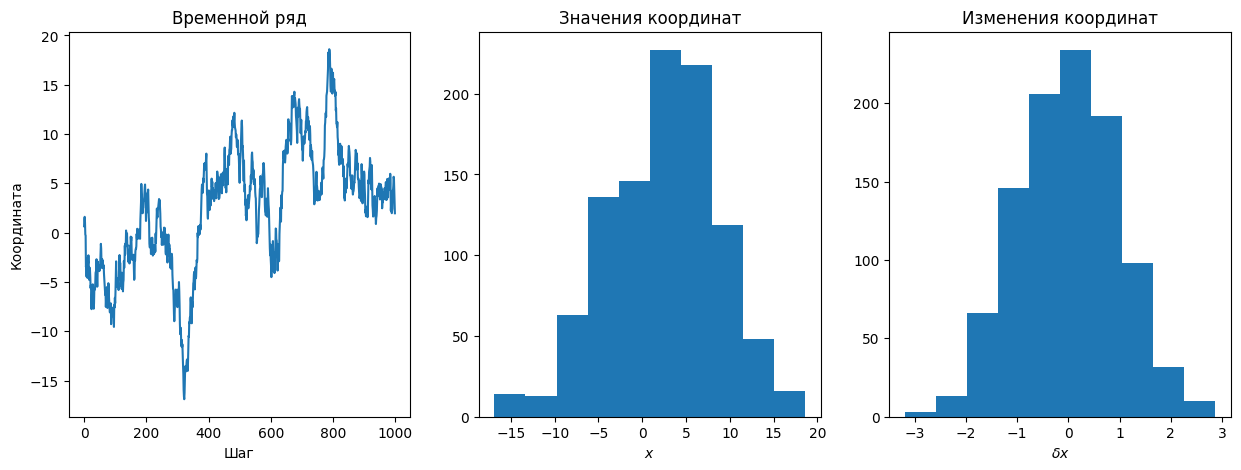

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_steps = 1000
deltas = norm.rvs(size = n_steps)
vals = np.cumsum(deltas)

f, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(vals)
ax[0].set_title("Временной ряд")
ax[0].set_xlabel("Шаг")
ax[0].set_ylabel("Координата")
ax[1].hist(vals)
ax[1].set_title("Значения координат")
ax[1].set_xlabel("$x$")
ax[2].hist(deltas)
ax[2].set_title("Изменения координат")
ax[2].set_xlabel("$\delta x$")

При каждом перестроении распределение координат непредсказуемо смещается, тогда как распределение изменений остается примерно неизменным. 

Как и в случае с неодинаково распределенными событиями, классическая статистика только ограничено применима к зависимым событиям. Однако на практике огромное число задач связано именно с анализом выборок с зависимыми величинами. Сюдя относится почти все что связано с анализом временных рядов - от предсказаний солнечной активности до биржевых индексов.

## Гистограммы

Ниже мы будем иметь дело со множеством случайных выборок и было бы здорово иметь способ быстро составить представление о них. В следующих параграфах мы поговорим о различных способах описать выборку набором чисел, но зачастую на практике знакомство с данными стоит начать с анализа гистограмм.

Термин гисторгамма был предложен Карлом Пирсоном. Гистограммой называется примерное представление численных данных и она позволяет оценить частоту появления определенных значений в данных. Для построения гисторамы необходимо определить интервалы (бины) возможных значений исследуемой величины. Обычно интервалы выбирваются равновеликими и неперекрывающимися. После этого, каждому интервалу ставится в соответтствие количество измерений в выборке попадающих в этот интервал.

Рассмотрим выборку случайных чисел: 

    (0.2, 0.4, 4.1, 2.9, 3.1, 2.3, 4.7, 1.)

Введем определим границы интервалов целыми числами:
    
    Интарвал 1: [0, 1)
    Интервал 2: [1, 2)
    Интарвал 3: [2, 3)
    Интервал 4: [3, 4)    
    Интервал 5: [4, 5)
    
Определим сколько измерений попало в каждый из интервалов:

    Интарвал 1: [0, 1) - 2 измерения
    Интервал 2: [1, 2) - 1 измерение
    Интарвал 3: [2, 3) - 2 измерения
    Интервал 4: [3, 4) - 1 измерение  
    Интервал 5: [4, 5) - 2 измерения 

Изобразим полученную гистограмму.

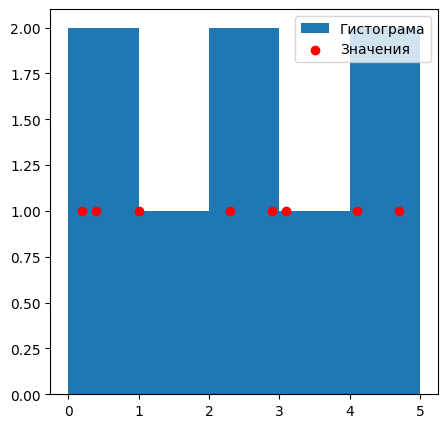

In [18]:
import matplotlib.pyplot as plt
import numpy as np
x = [0.2, 0.4, 4.1, 2.9, 3.1, 2.3, 4.7, 1.]
f = plt.figure(figsize=(5, 5))
plt.hist(x, range = [0, 5], bins = 5, label = "Гистограма")
plt.scatter(x, np.ones(len(x)), color = 'red', label = "Значения")
plt.legend()

Обратите вниамние, что для построения гистограммы мы воспользовались функцией библиотекой `matplotlib`. В данном случае у нас мало данных, так что гистограмма оказалась не слишком информативной. Но давайте рассмотрим следующий пример:

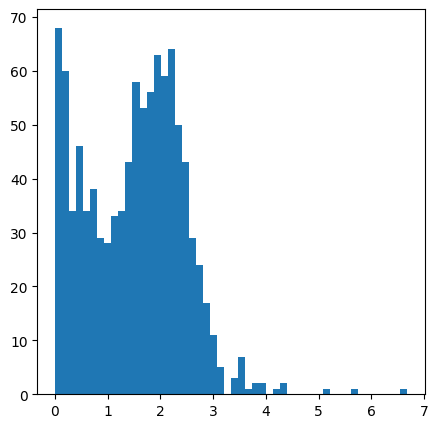

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, expon
x = np.append(expon.rvs(size = 500), norm.rvs(loc = 2, scale = 0.5, size = 500))
f = plt.figure(figsize=(5, 5))
_ = plt.hist(x, bins = 50)

Из этой гистограммы видно что наша выборка составлена из распределения имеющего по крайней мере две моды, хвост в сторону больших значений, и почему-то ограничена в нуле.

    Для справки - выборка выше получена из суммы нормального и экспоненциального распределений.

## Статистика

Итак, мы хотим определить свойства генеральной совокупности по имеющейся выборке. Для этого мы должны как-то обработать выборку и получить _статистику_  (statistic). Статистикой называется результат применения статистического алгоритма к выборке. Среднее, стандартное отклонение, медиана, даже объем выборки - все это является статистиками. "Статистический алгоритм" может быть как очень простым (например, минимум выборки) так и довольно сложным (например, выборка может быть подана на вход сложной ML-модели и статисикой будет вывод этой модели). Ниже приведен пример подсчета некоторых статистик на выборке из десяти случайных чисел с помощью пакета `numpy`.

In [20]:
import numpy as np
# Создаем вектор из десяти случайных чисел
from numpy.random import rand
a = rand(10)

# Считаем статистики
mean, std, size = a.mean(), a.std(), a.size
print("Mean:",mean)
print("Std:",std)
print("Size:",size)

Mean: 0.3553754282859767
Std: 0.29137810545373954
Size: 10


### Среднее
Самая часто встречающаяся статистика - это среднее (mean).

$$\hat{x} = \frac{1}{N}\sum_{i=1...N} x_i$$

Среднее значение лего постчиать и зачастую среднее по выборке является очень информативой величиной. Среднее по выборке является _несмещеной_ оценкой математического ожидания величины (среднего по популяции) - если взять большое количество выборок и посчитать для каждой из них среднее, то среднее от этих средних будет стремиться к среднему по генеральной совокупности. В тексте ниже среднее по выборке значений $x$ будет обозначаться с помошью знака над симоволом $\hat{x}$, а матмематическое ожидание популяции из которой была сделана выборка будет обозначаться греческой буквой $\mu_x$ или оператором $E(x)$ (_E_ - от _expected_). 

Не стоит, однако, использовать среднее вслепую. Само по себе среднее значение может принимать абсурдные значения - например в случае дискретных величин (`каждый человек болел ковидом в среднем 0.07 раз`).

Кроме того, среднее очень плохо реагирует на выборсы. Сравните, например, две выборки одинакового размера из одного и того же распределения.

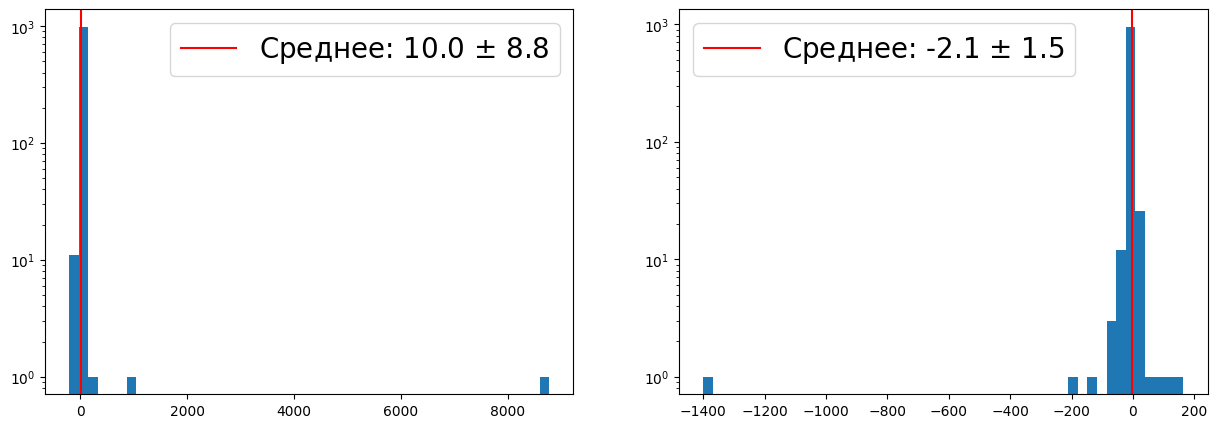

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import cauchy
import numpy as np
np.random.seed(1234)
s1 = cauchy.rvs(size = 1000)
s2 = cauchy.rvs(size = 1000)
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(s1, bins =  50)
ax[0].axvline(s1.mean(), color = 'red', label=f"Среднее: {round(s1.mean(), 1)} $\\pm$ {round(s1.std()/(len(s1)-1)**0.5,1)}")
ax[0].legend(fontsize=20)
ax[0].set_yscale('log')
ax[1].hist(s2, bins =  50)
ax[1].axvline(s2.mean(), color = 'red', label=f"Среднее: {round(s2.mean(), 1)} $\\pm$ {round(s2.std()/(len(s2)-1)**0.5,1)}")
ax[1].legend(fontsize=20)
ax[1].set_yscale('log')

На примере выше видно, что среднее сильно смещено в сторону выброса, так что само по себе значение среднего не очень информативно. 
    
    Конечно, для сравнения двух величин всегда нужно оценивать их ошибку. Но в данном случае оценка ошибки среднего не помогла - 
    мы сделали выборку из распределения Коши, математическое ожидание которого не определено. 
    
Борьба с флуктуациями и выбросами - это отдельная интересная тема. На практике часто применяются два подхода:
   - Отбросить несколько крайних значений(например, первую и последнюю персинтиль) и посчитать среднее на "обрезанной" выборке
   - Посчитать медиану (в некотором смысле это предельный случай первого подхода)

###  Линейность среднего


Среднее является линейным оператором:

$$ E(ax+b) = aE(x)+b$$

Это очевидно для случая когда мы считаем среднее по выборке, а после следующей лекции это будет очевидно и для среднего по _распределению_ (матожидания).


В случае если мы считаем сумму нескольких случайных величин $x_i$, то сумма их среднего является средним их суммы:

$$ E(\sum_i x_i) = \sum_i E(x_i)$$

Если эти величины независимы, то это свойство распростарняется и на произведение:

$$ E(\prod_i x_i)  = \prod_i E(x_i)$$

### Закон больших чисел

Среднее полученоое по выборке независимых и идентично распределенных случайных величин стремится к математическому ожиданию с ростом выборки. Это свойство среднего является законом больших чисел (Law of Large Numbers, LLN). Существует несколько формулировок закона отличающихся определением сходимости, но рассмотрение их различий несколько выходит за рамки данной лекции.

Для иллюстрации закона больших чисел рассмотрим как меняется среднее значение выборки с ростом ее размера.

/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34230/3041469471.py:7: RuntimeWarning: Mean of empty slice.
  means = np.array([sample[:i-n_steps].mean() for i in range(n_steps)])


Text(0.5, 0, 'Размер выборки')

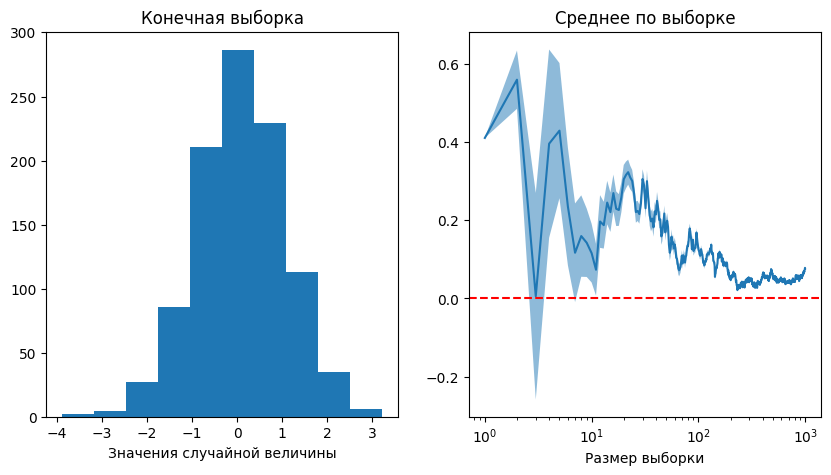

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_steps = 1000
sample = norm.rvs(size = n_steps)
means = np.array([sample[:i-n_steps].mean() for i in range(n_steps)])
means_err = np.array([sample[:i-n_steps].std()/i for i in range(n_steps)])
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(sample)
ax[0].set_title("Конечная выборка")
ax[0].set_xlabel("Значения случайной величины")
ax[1].fill_between(range(n_steps), means+means_err, means-means_err, alpha = 0.5)
ax[1].plot(means, label = "Среднее по выборке")
ax[1].axhline(0, ls = '--', color = 'red')
ax[1].set_title("Среднее по выборке")
ax[1].set_xscale("log")
ax[1].set_xlabel("Размер выборки")


Отметим, что в случае если матожидание популяции не оперделено, то среднее по выборке не будет сходиться к определенному значению. Рассмотрим распределение Коши которое уже встерчалось выше.

/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34230/1002243568.py:7: RuntimeWarning: Mean of empty slice.
  means = np.array([sample[:i-n_steps].mean() for i in range(n_steps)])


Text(0.5, 0, 'Размер выборки')

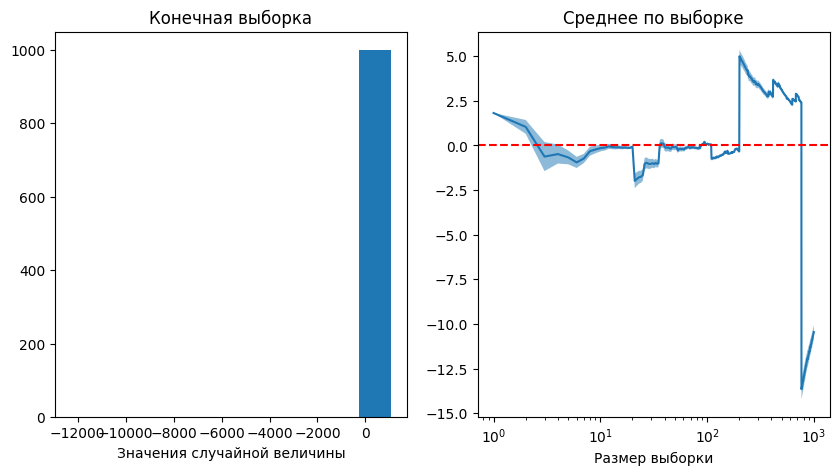

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

n_steps = 1000
sample = cauchy.rvs(size = n_steps)
means = np.array([sample[:i-n_steps].mean() for i in range(n_steps)])
means_err = np.array([sample[:i-n_steps].std()/i for i in range(n_steps)])
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(sample)
ax[0].set_title("Конечная выборка")
ax[0].set_xlabel("Значения случайной величины")
ax[1].fill_between(range(n_steps), means+means_err, means-means_err, alpha = 0.5)
ax[1].plot(means, label = "Среднее по выборке")
ax[1].axhline(0, ls = '--', color = 'red')
ax[1].set_title("Среднее по выборке")
ax[1].set_xscale("log")
ax[1].set_xlabel("Размер выборки")


### Медиана

Медиана (median) - это значению отделяющее бОльшую половину данных от меньшей. Дла определения медианы набора чисел нужно упорядочить их по возрастанию и взять число из середины. Так, медианой набора `(0, 1, 1, 4, 10)` является `1`. Медиана более устойчива к выбросам и ее значение всегда будет из наблюдаемого набора данных `(в случае с ковидом, медиана по миру находится на "ни одного задукоментирвоанного случая")`. 
    

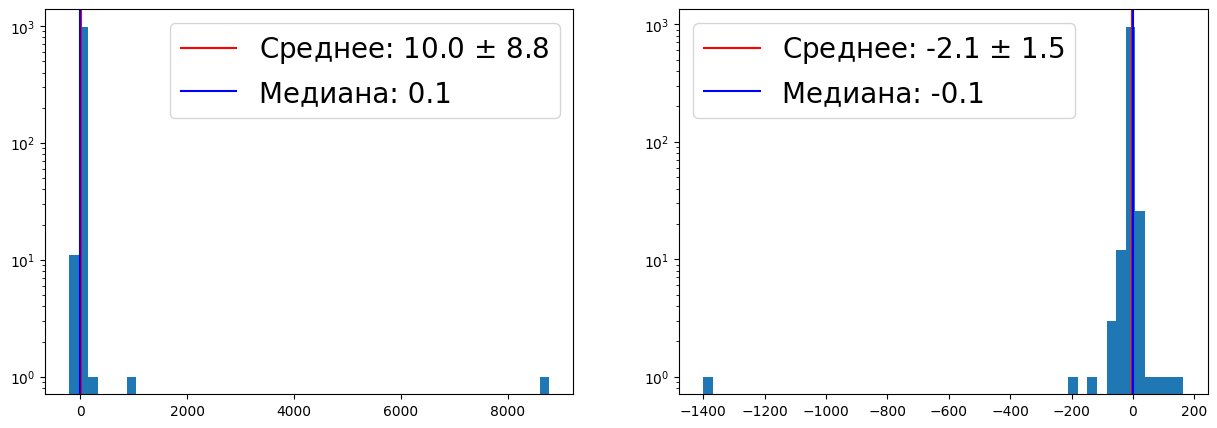

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import cauchy
import numpy as np
np.random.seed(1234)
s1 = cauchy.rvs(size = 1000)
s2 = cauchy.rvs(size = 1000)
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(s1, bins =  50)
ax[0].axvline(s1.mean(), color = 'red', label=f"Среднее: {round(s1.mean(), 1)} $\\pm$ {round(s1.std()/(len(s1)-1)**0.5,1)}")
ax[0].axvline(np.median(s1), color = 'blue', label=f"Медиана: {round(np.median(s1), 1)}")
ax[0].legend(fontsize=20)
ax[0].set_yscale('log')
ax[1].hist(s2, bins =  50)
ax[1].axvline(s2.mean(), color = 'red', label=f"Среднее: {round(s2.mean(), 1)} $\\pm$ {round(s2.std()/(len(s2)-1)**0.5,1)}")
ax[1].axvline(np.median(s2), color = 'blue', label=f"Медиана: {round(np.median(s2), 1)}")
ax[1].legend(fontsize=20)
ax[1].set_yscale('log')

Недостатком медианы является сложность ее вычисления - ведь для этого необходимо упорядочить весь набор данных. В случае с большим количеством данных (особенно распределенных) задача становится совсем нетривиальной и в ход идут приблизительные значения. Посмотрите, например,на [интерфейс](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.approxQuantile.html) фреймворка Apache Spark для вычисления приближенных квантилей.
Кроме того, медиана может меняться скачками - особенно в случаях дискретных переменных. В некоторых случаях это может означать недостаточную чувствтительность к изменениям.

    Представьте что вы контролируетет число кликов на товары сделанное пользователями в вашем интернет-магазине. Если медиана находится на, скажем, пяти кликах, то для обнаружения изменения в поведении пользователей вам понадобится изменения числа кликов на 20% - что очень много. В этой ситуации лучше пользоваться средним или его вариацией - полученное число будет не целым, но вы сможете более аккуратно следить за поведением пользователей.

### Мода

Еще одной популярной статистикой является мода (mode) - наиболее часто встречающееся значение в выборке. В случае с непрерывными данными моду лучше определять по гистограмме. Мода не чувствтительна к выбросам и не чувствтительна к хвостам распределений.

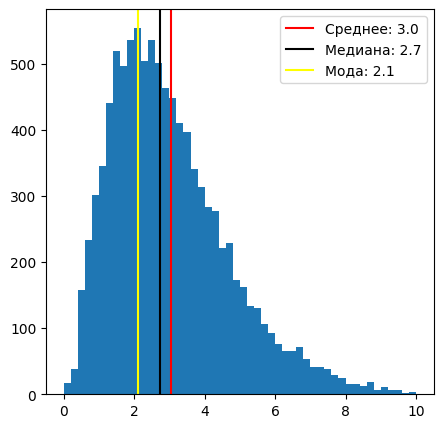

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import gamma
import numpy as np
np.random.seed(1234)
x = gamma(3).rvs(size = 10000)
f = plt.figure(figsize=(5, 5))
vb = plt.hist(x, bins = 50, range = [0, 10])
plt.axvline(x.mean(), color = 'red', label=f"Среднее: {round(x.mean(), 1)}")
plt.axvline(np.median(x), color = 'black', label=f"Медиана: {round(np.median(x), 1)}")
vals, bins = vb[0],vb[1]
mode_pos = np.argmax(vals)
mode = (bins[mode_pos+1]+bins[mode_pos])/2
plt.axvline(mode, color = 'yellow', label=f"Мода: {round(mode, 1)}")
plt.legend()

Зачастую бывает важно оценить количество мод в выборке. Мультимодальность может означать вклад от несколькоих источников.
    
    Бимодальное распределение ниже, например, часто встречается в экспериментальной физике частиц при анализе масс обнаруженых частц. Пик соответствует правильно восстановленным частицам, а экспоненицальная подложка - комбинаторному фону.

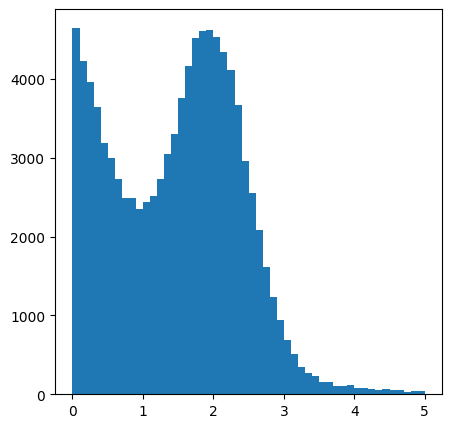

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, expon
x = np.append(expon.rvs(size = 50000), norm.rvs(loc = 2, scale = 0.5, size = 50000))
f = plt.figure(figsize=(5, 5))
_ = plt.hist(x, bins = 50, range = [0, 5])

### Вариация и среднеквадратичное отклонение

Помимо среднего по выборке, важно понимать насколько велик разброс данных. Сравните две выборки с одинаковым средним:

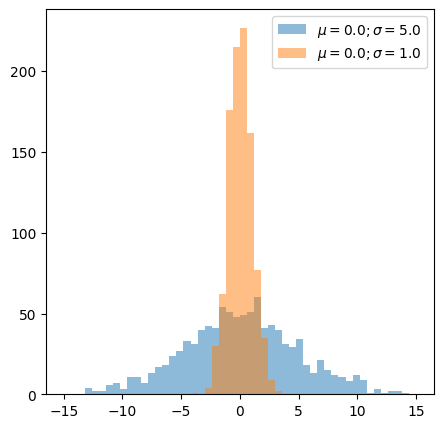

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
np.random.seed(1234)
s1 = norm.rvs(loc = 0, scale = 5,size = 1000)
s2 = norm.rvs(loc = 0, scale = 1,size = 1000)
f = plt.figure(figsize=(5, 5))
plt.hist(s1, bins =  50, range = [-15, 15], alpha = 0.5, label = f"$\\mu={round(s1.mean(),0)};\\sigma={round(s1.std(),0)}$")
plt.hist(s2, bins =  50, range = [-15, 15], alpha = 0.5, label = f"$\\mu={round(s1.mean(),0)};\\sigma={round(s2.std(),0)}$")
plt.legend()

Общепринятой мерой разброса значений случайной величины в популяци является среднеквадратичное отклонение (population standard deviation) определяемое по формуле:

$$ \sigma = \sqrt{\frac{\sum(\mu-x)^2}{N}}$$

где $\mu$ является математическим ожиданием и суммирование проводится по всем элементам популяции.
Среднеквадратичное отклонение имеет размерность исследуемой велиничны. В случае нормального распределенных значений выборки, центральный интервал шириной в два среднеквадратичных отклонениея содержит примерно 68% всех значений.

Если мы применим формулу выше к выборке (и возьмем среднее вместо матожидания), то получим смещеную оценку среднеквадратичного отклонения генеральной совокупности - стандартное отклонение (standard deviation). Для оценки среднеквадратичного отклонения популяции по выборке используется несмещеная оценка стандартного отклонения (corrected sample standard deviation)

$$ s = \sqrt{\frac{\sum_{i=1...N}(\hat{x}-x_i)^2}{N-1}}$$

Обратите внимание, что в этой формуле мы использовали среднее по выборке вместо матожидания. Аналогично среднему и матожиданию, для различия оценки величины и ее значения по выборке мы будем использовать латинские и греческие буквы $s$ и $\sigma$ соответственно.


Посмотрите как выглядят смещеная и несмещеная оценки среднеквадратичных отклонений полученных для большого количетсва случайных выборок фиксированного размера.

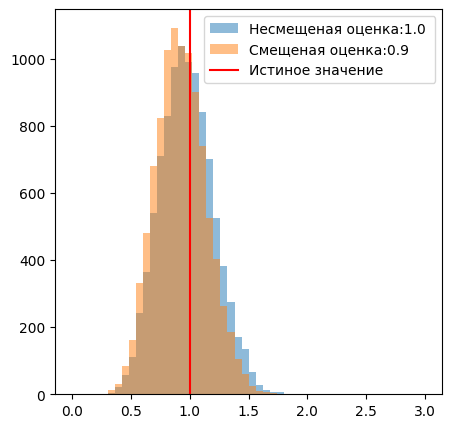

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
np.random.seed(1234)
unbiased_s = []
biased_s = []
n = 10
for i in range(10000):
    
    sample = norm.rvs(size = n)
    unbiased_s.append(sample.std()*pow(n/(n-1),0.5)) 
    biased_s.append(sample.std()) 
f = plt.figure(figsize=(5, 5))
plt.hist(unbiased_s, bins =  50, range = [0, 3], alpha = 0.5, label = f"Несмещеная оценка:{round(np.array(unbiased_s).mean(),1)} ")
plt.hist(biased_s, bins =  50, range = [0, 3], alpha = 0.5, label = f"Смещеная оценка:{round(np.array(biased_s).mean(),1)} ")
plt.axvline(1, color = 'red', label = "Истиное значение")
plt.legend()

А вот как меняются средние значения этих оценок при изменении размера выборки. Видно, что разница между смещеной и несмещеной оценкой падает с ростом размера выборки - как и следовало ожидать.

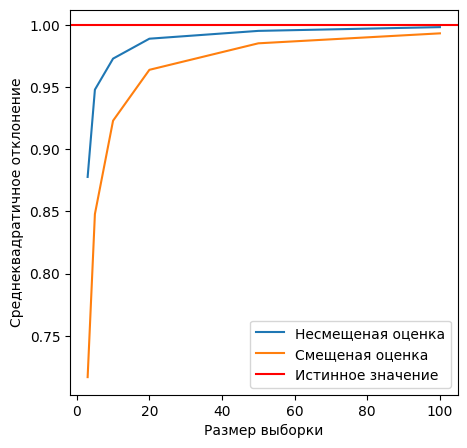

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
np.random.seed(1234)
unbiased_s = []
biased_s = []
ns = [3, 5, 10, 20, 50, 100]
for n in ns:
    unbiased_s.append(0)
    biased_s.append(0)
    for i in range(10000):
        sample = norm.rvs(size = n)
        unbiased_s[-1]+=sample.std()*pow(n/(n-1),0.5)/10000
        biased_s[-1]+=sample.std()/10000
f = plt.figure(figsize=(5, 5))
plt.plot(ns, unbiased_s, label = f"Несмещеная оценка")
plt.plot(ns, biased_s, label = f"Смещеная оценка")
plt.axhline(1, color = 'red', label = "Истинное значение")
plt.xlabel("Размер выборки")
plt.ylabel("Среднеквадратичное отклонение")
plt.legend()

Другой мерой разброса случайной величины является дисперсия (в англоязфчной литературе эта веиличина называеся variance) - средний квадрат отклонения случайной величины от среднего по популяции. Оценка дисперсии может быть смещеной (квадрат среднеквадратичного отклонения) и несмещеной (квадрат несмещеного среднеквадратичного откления). Оператор дисперсии ободначается как $V(x)$, где _V_ является сокрашением от _varience_.

Оценки дисперсия и среднеквадратичное отклонения связаны простым преобразованием, но это не одно и тоже. На практике, большое количество ошибок возникает из-за смешения этих величин.

### Преобразования дисперсии

Мы ввели дисперсию как квадрат среднеквадратичного отклонения:

$$ V(x)\equiv \sigma^2 \equiv \frac{\sum_i(\mu-x_i)^2}{N}$$

Таким образом:

$$V(x) = E((\mu-x)^2) = E(\mu^2 - 2\mu x +x^2)$$

Воспользуемся свойством линейности среднего, и вспомним что $\mu$ - это константа а не случайная величниа:

$$V(x)= \mu^2-2\mu E(x) + E(x^2) $$

Заметим, что $\mu\equiv E(x)$:

$$V(x)= E(x^2) - \mu^2$$

Отсюда следует несколько результатов:

- $E(x^2) = \sigma^2 + \mu^2$
- $V(ax+b) = a^2V(x)$ 

Для суммы и произведения независимых переменных можно показать:

- $V(\sum_i x_i) = \sum_i V(x_i)$
- $V(\prod_i x_i) = \prod_i(\sigma_i^2+\mu_i^2) -\prod_i\mu_i^2$

### Стандартная ошибка

Еще одна важная статитиска которую можно определить на выборке - это стандартная ошибка (standard error):

$$ \sigma_{\hat{x}}=\frac{\sigma_x}{\sqrt{N}}$$

В случае если среднеквадратичное отклонение популяци неизветсно, можно получить оценку стандартной ошибки используя несмещеное стандартное отклонение:

$$s_{\hat{x}}  = \frac {s}{\sqrt{N}}\equiv \sqrt\frac{\sum_i(\hat{x}-x_i)^2}{N(N-1)}$$

В отличие от среднеквадратичного отклонения и среднего, стандартная ошибка не является оценкой популяции - она является характеристикой выборки. С ростом выборки стандартная ошибка стремится к нулю. Стандартная ошибка описывает насколько далеко может находиться среднее по выборке от матожидания.

### Бутстрап

Стандартная ошибка позволяет определить нсколько среднее по выборке может отстоять от среднего по популяции. Но что делать с другими статистиками? Это важный вопрос, ведь забегая немного вперед предсказание полученное методами машинного обучения - это тоже статистика на тренировочной выборке.
 
Находясь в парадигме классической статистики (дисциплины), для определения ошибки статистики (величины) на выборке данного размера мы должны были бы собрать большое количество таких выборок, посчитать на них статистику, и посмотреть как меняется распределение статистик. Попытаемся таким образом определить ошибку стастистики  `медиана` полученной на выборке из фиксированного количества значений некоторой случайной величины.

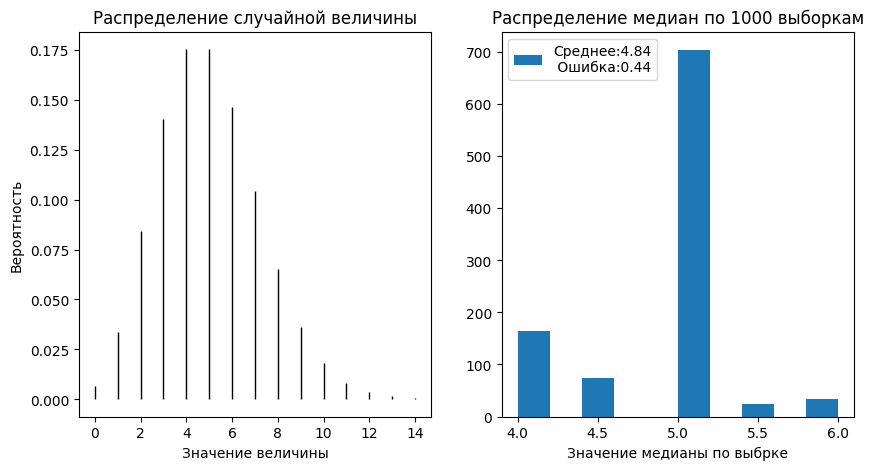

In [30]:
from scipy.stats import poisson
p = poisson(mu = 5)
sample_size = 50
meds = []
for r in range(1000):
    meds.append(np.median(p.rvs(sample_size)))

f, ax = plt.subplots(1, 2, figsize = (10, 5))
x = range(15)
ax[0].vlines(x, 0, p.pmf(x), colors='k', linestyles='-', lw=1)
ax[0].set_title("Распределение случайной величины")
ax[0].set_ylabel("Вероятность")
ax[0].set_xlabel("Значение величины")
ax[1].hist(meds, label = f"Среднее:{round(np.mean(meds),2)}\n Ошибка:{round(np.std(meds),2)}")
ax[1].set_title("Распределение медиан по 1000 выборкам")
ax[1].set_xlabel("Значение медианы по выбрке")
ax[1].legend()


На практике, однако, редко бывает возможность получать все новые и новые выборки (как правило, новые данные используются для уточннения существующего прогноза а не для исследований его точности). На помощь приходит техника бутстрапа (bootstrap). В простейшем случае, бутстрап подразумевает замену выборок из генеральной совокупностями __выборками__ из уже существующеей выборки __с повторениями__. Ниже приведено сравнение результатов ошибки полученной с помощью выборок из генеральной совокупности и ошибки полученной бутстрапом.

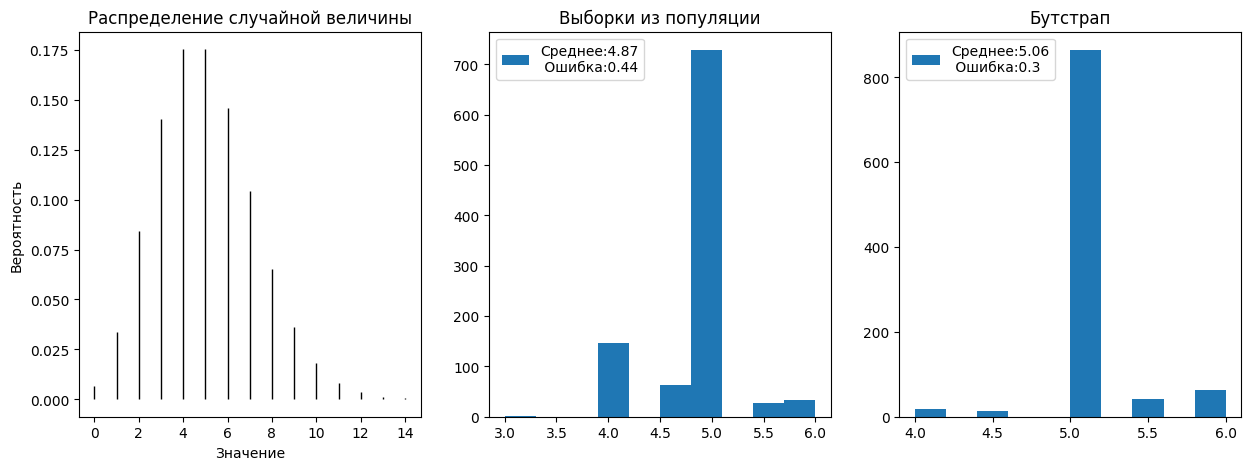

In [31]:
from scipy.stats import poisson
import numpy as np
p = poisson(mu = 5)
sample_size = 50
sample = p.rvs(sample_size)
meds = []
meds_bs = []
for r in range(1000):
    meds.append(np.median(p.rvs(sample_size)))
    meds_bs.append(np.median(np.random.choice(sample, size = sample_size, replace=True)))

f, ax = plt.subplots(1, 3, figsize = (15, 5))
x = range(15)
ax[0].vlines(x, 0, p.pmf(x), colors='k', linestyles='-', lw=1)
ax[0].set_title("Распределение случайной величины")
ax[0].set_ylabel("Вероятность")
ax[0].set_xlabel("Значение")
ax[1].hist(meds, label = f"Среднее:{round(np.mean(meds),2)}\n Ошибка:{round(np.std(meds),2)}")
ax[1].set_title("Выборки из популяции")
ax[1].legend()
ax[2].hist(meds_bs, label = f"Среднее:{round(np.mean(meds_bs),2)}\n Ошибка:{round(np.std(meds_bs),2)}")
ax[2].set_title("Бутстрап")
ax[2].legend()


Бутстрап имеет свои ограничения. Оценка полученная бутстрапом может быть неверной в случае маленокого размера выборки, бутстрап не подходит для распределений с неопределнным стандартным отклонением, в конце концов бутстрап может быть довольно ресурсоемкой процедурой. Однако при аккуратном применении, простота метода компенсирует эти неудобства.

### Корреляция и ковариация

Приведенные выше статистики (за исключением моды и медианы) относительно легко обобщаются на случай многомерных данных. Cреднеквадратичное отклонение и среднее можно легко считать для каждого измерения.  Однако для описания дисперсии  в случае многмерных данных нужно исползовать матрицу а не вектор. Сравните две выборки с одинаковыми среднеквадратичными отклонениями по каждой из осей. 

/Users/komari/lectures/From-Stats-to-ML/venv/lib/python3.12/site-packages/scipy/stats/_multivariate.py:757: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


(-10.0, 10.0)

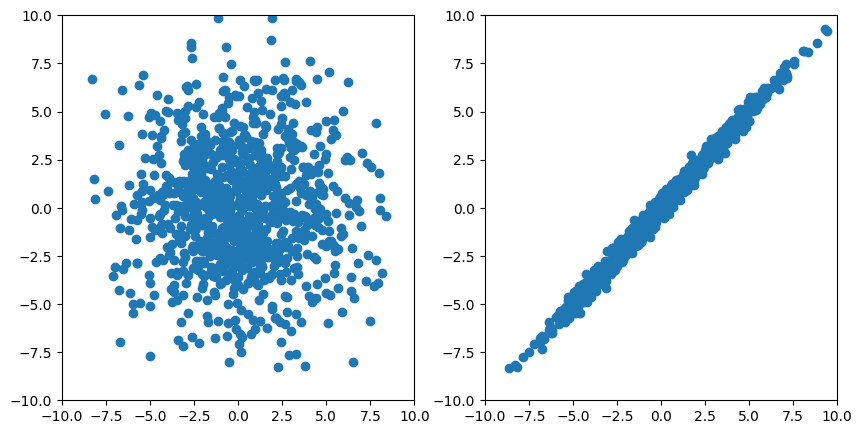

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np
np.random.seed(1234)

x_1 = multivariate_normal([0,0],
                          [[10, 0],
                           [0, 10]]).rvs(1000)
x_2 = multivariate_normal([0,0],
                          [[10, 10],
                           [9.9, 10]]).rvs(1000)

f, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].scatter(*x_1.T)
ax[0].set_xlim([-10, 10])
ax[0].set_ylim([-10, 10])
ax[1].scatter(*x_2.T)
ax[1].set_xlim([-10, 10])
ax[1].set_ylim([-10, 10])

Для оценки совместной вариации значений случайной величинц вдоль нескольких степеней свободы используется ковариация (covariance) - математическое ожидание произведения отклонений случайных величин:

$$cov(x, y) = M((x-\mu_x)(y-\mu_y))\equiv M(xy)-\mu_x\mu_y$$ 

В этой формуле $M(x)$ означает математическое ожидание (среднее по популяции) от величниы x. Для оценки ковариации из выборки, математические ожидания $\mu_x$, $\mu_y$, и $M(xy)$ заменяются средними значенями по выборке.

Ковариация является ненормированной величиной, поэтом абсолютные значения ковариации сложно интерпретированть. Нормированная ковариаци называется корреляцией (correlation):

$$corr(x,y)=\frac{cov(x,y)}{\sigma_x\sigma_y} $$

Нулевая корреляция означает отстутсвие __линейной__ зависимости между двумя величинами, ненулевые значения свидетельствуют о ее наличии. Положительная корреляция говорит о том что две виличины растут и падают синхронно. Отрицательная корреляция говорит о том что рост одной из величин сопряжен с уменьшением другой.

## Проблемы описательной статистики

Как правило, знакомство с новыми данными лучше всего начинать с визуализации а не с подтсчета статистик. Довольно убедительное обоснование этого утверждения привели авторы статьи [Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing](https://www.autodesk.com/research/publications/same-stats-different-graphs) своим классическим датасетом "DatasaurusDozen". Сравните распределения ниже - все они имеют одинаковые статистсики.

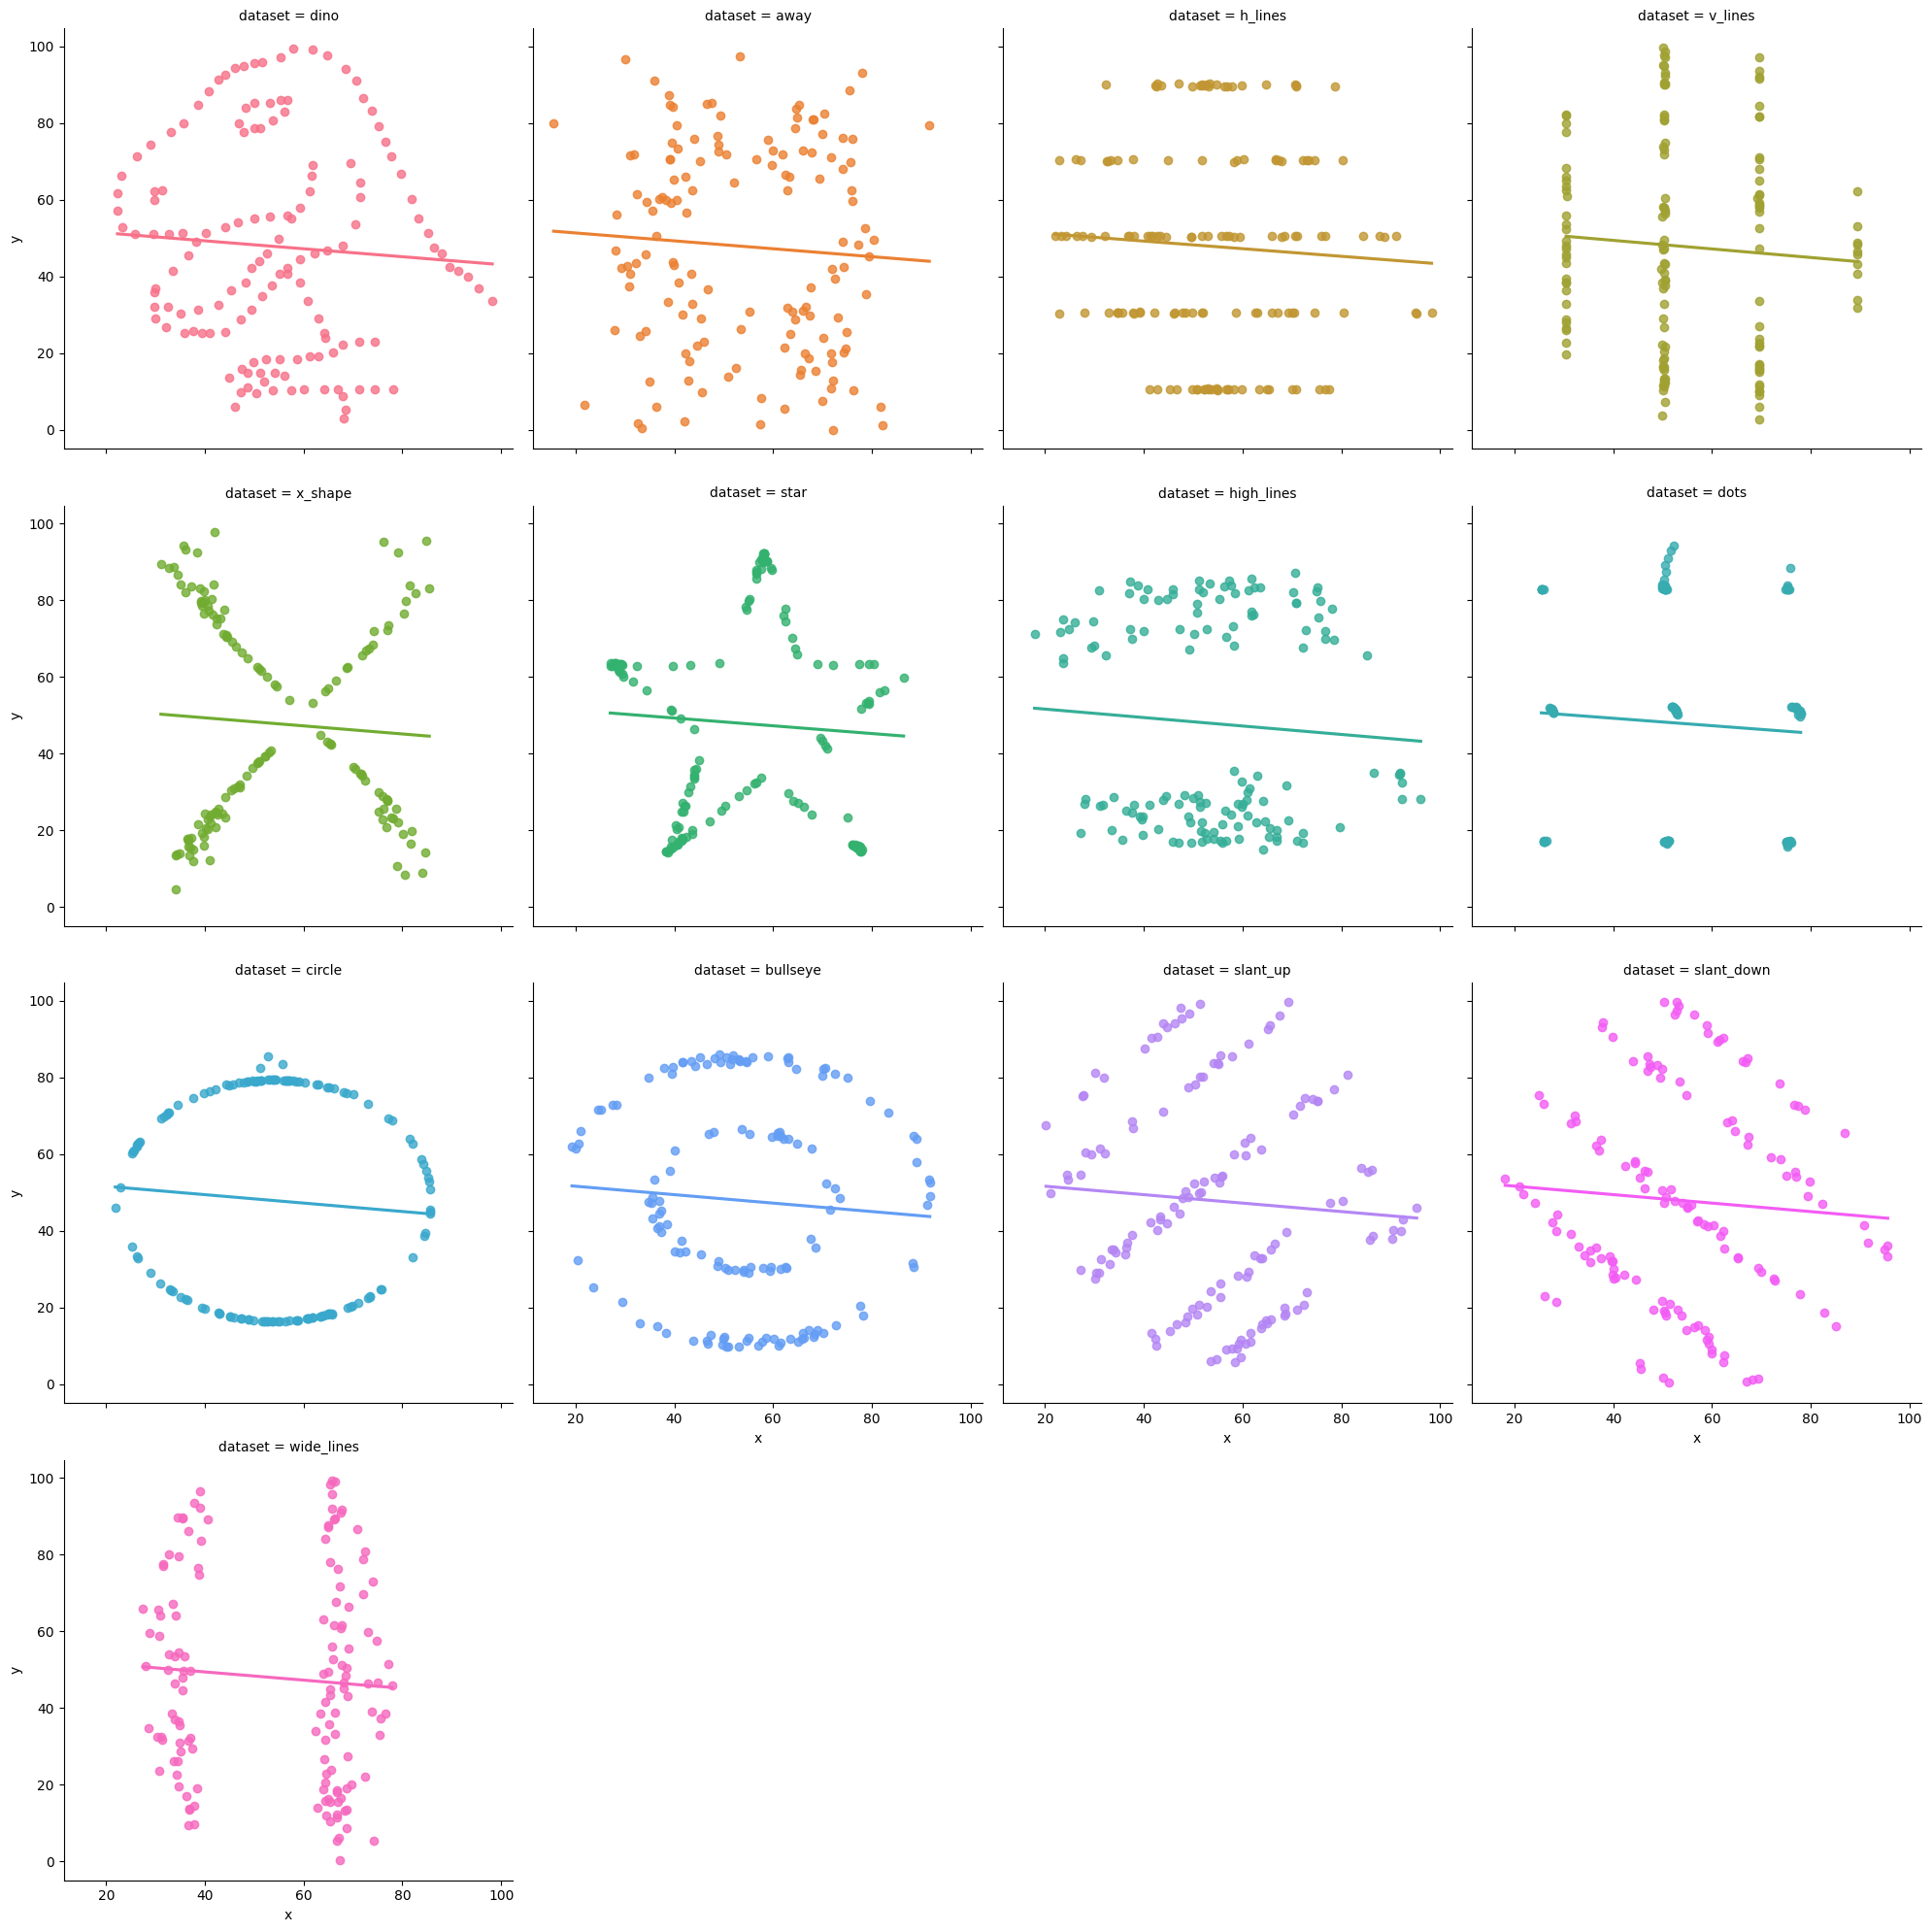

In [36]:
import pandas as pd
import seaborn as sns
dt= pd.read_csv('DatasaurusDozen.tsv', sep='\t')
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=dt,
           col_wrap=4, ci=None)


Хотя коллекция распределений выше сама по себе является убедительным аргументом в пользу осторожного отношения к описательной статистке, рассмотрим для полноты картины несколько часто встречающихся заблуждений.

### Заблуждение: Корреляция означает причинно-следственную связь 
"Correlation is not a causation" - довольно часто звучащие слова в анализе данных. Корреляция между переменными совсем не обязательно показывает наличие причинно-следственных связей между ними. 

    Например, потребление мороженного коррелирует с продажами солнцезащитного крема, но происходит это не потому что мороженное вызывает ожоги, а потому что у обоих явлений (покупка мороженного и солнцезащитного крема) есть общие предпосылки. Искуственное повышение продаж мороженного никак не повлияет на продажи солнцезащитного крема.

### Заблуждение: Отсутствие корреляция означает независимость

Ошибочность этого утверждения хорошо видна из иллютсрации ниже. 


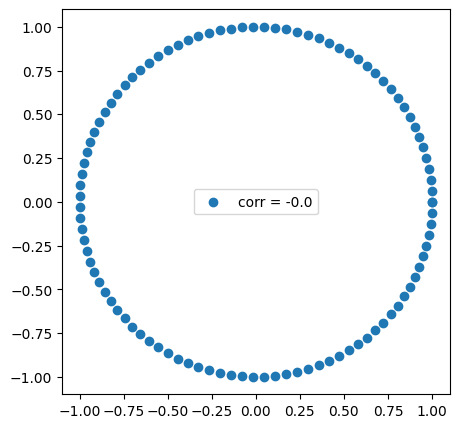

In [37]:
import numpy as np
a = 2*np.pi*np.linspace(0, 1, 100)

y = np.sin(a)
x = np.cos(a)

np.corrcoef(x, y)

f = plt.figure(figsize = (5, 5))
plt.scatter(x, y, label = f"corr = {np.round(np.corrcoef(x, y)[0][1], 3)}" )
plt.legend()

Напомним, что корреляция является мерой __линейной__ зависимости двух величин. В случае нелинейной зависимости корреляция вполне может остутвовать, что и происходит в примере выше.

### Парадокс Симпсона

Ошибочные заблуждения можно сделать на основании слишком высокоуровневых статистик - глобальный тренд может пропадать при более детальном рассмотрении. Рассмотрим данные ниже (данные взяты из датасета `DatasaurusDozen`).

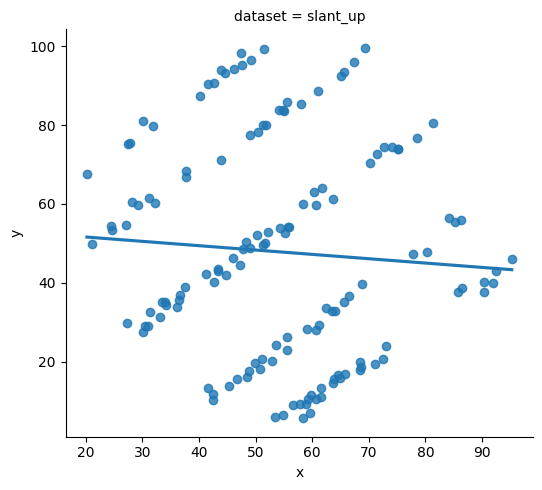

In [39]:
import pandas as pd
import seaborn as sns
dt= pd.read_csv('DatasaurusDozen.tsv', sep='\t')
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=dt.loc[dt['dataset']=='slant_up'],
           col_wrap=4, ci=None)

Глобальный тренд этого датасета негативный (обратите внимание на непрерываную линию), но при детальном рассмотрени видно что датасет состоит из пяти подмножеств в сильным положительным трендом в каждом из них.

Эту особенность описательной статистики назвали в честь Эдварда Симпсона, описавшего ее в 1951 году (справедливости ради, Пирсон опередил Симпсона почти на полвека). Рассмотрим классический пример парадокса Симпсона вдохновленный [данными](https://homepage.stat.uiowa.edu/~mbognar/1030/Bickel-Berkeley.pdf) поступеления в университет Беркли в 1973 году (в примере ниже данные специально упрощены для наглядности)

Сводная таблица ниже показывает доли успешных поступлений в выдуманный университет в зависимости от пола абитуриента. Видно, что среди мужчин процент успеха выше. Можно ли отсюда сделать вывод о гендерном неравенстве при решени о зачислении?


<table style="margin-left:auto; margin-right:auto; border:none; text-align:right;">

<tbody><tr>
<th rowspan="2">
</th>
<th colspan="2">Общее
</th>
<th colspan="2">Мужчины
</th>
<th colspan="2">Женщины
</th></tr>
<tr>
<th>Заявлений
</th>
<th>Зачислено
</th>
<th>Заявлений
</th>
<th>Зачислено
</th>
<th>Заявлений
</th>
<th>Зачислено
</th></tr>
<tr>
<th>Всего
</th>
<td>12000
</td>
<td>51%
</td>
<td>6000
</td>
<td style="background: #9EFF9E;">68%
</td>
<td>5000
</td>
<td>40%
</td></tr></tbody></table>

Для ответа на этот вопрос, давайте примем во внимание что в нашем университете есть два факультета, и рассмотрим как проходил процесс зачисления в каждом из них.

<table style="margin-left:auto; margin-right:auto; border:none; text-align:right;">

<tbody><tr>
<th rowspan="2">Факультет
</th>
<th colspan="2">Общее
</th>
<th colspan="2">Мужчины
</th>
<th colspan="2">Женщины
</th></tr>
<tr>
<th>Заявлений
</th>
<th>Зачислено
</th>
<th>Заявлений
</th>
<th>Зачислено
</th>
<th>Заявлений
</th>
<th>Зачислено
</th></tr>
<tr>
<th>1
</th>
<td>6000
</td>
<td>83%
</td>
<td style="background: #FE9;">5000
</td>
<td>80%
</td>
<td>1000
</td>
<td style="background: #9EFF9E;">100%
</td></tr>
<tr>
<th>2
</th>
<td>6000
</td>
<td>18%
</td>
<td >1000
</td>
<td>10%
</td>
<td style="background: #FE9;">5000
</td>
<td style="background: #9EFF9E;">20%
</td></tr>
<tr>
<th>Всего
</th>
<td>12000
</td>
<td>51%
</td>
<td>6000
</td>
<td style="background: #9EFF9E;">68%
</td>
<td>5000
</td>
<td>40%
</td></tr>
<td colspan="7" style="text-align:left;">
<p>Обозначения цветов:<br />
</p>
<style data-mw-deduplicate="TemplateStyles:r981673959">.mw-parser-output .legend{page-break-inside:avoid;break-inside:avoid-column}.mw-parser-output .legend-color{display:inline-block;min-width:1.25em;height:1.25em;line-height:1.25;margin:1px 0;text-align:center;border:1px solid black;background-color:transparent;color:black}.mw-parser-output .legend-text{}</style><div class="legend"><span class="legend-color mw-no-invert" style="background-color:#9EFF9E; color:black;">&#160;</span>&#160;процент успешных заявок выше чем для лиц другого пола</div>
<link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r981673959"/><div class="legend"><span class="legend-color mw-no-invert" style="background-color:#FE9; color:black;">&#160;</span>&#160;общее число заявок выше чем у лиц дугого пола</div>
</td></tr></tbody></table>

Видно, что в каждом из факультетов у женщин был выше средний процент успеха. Наблюдаемый же дисбаланс произошел из-за того, что большинство абитурентов мужского пола пошли на факультет 1 с, очевидно, более низкой конкуренцией.

